In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [21]:
df = pd.read_csv('RICE.csv')
df.head()

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack


## more details on columns for better understanding

1. Observation Year: The year in which the observation was made.
2. Standard Week: The week number within the year.
3. Pest Value: The value or count associated with the pest observation. It is measured in "Number/hill."
4. Collection Type: The method or type of collection used to gather the pest data.
5. MaxT: Maximum temperature recorded during the observation.
6. MinT: Minimum temperature recorded during the observation.
7. RH1(%): Relative humidity measurement (possibly the first reading).
8. RH2(%): Relative humidity measurement (possibly the second reading).
9. RF(mm): Rainfall measurement.
10. WS(kmph): Wind speed measurement.
11. SSH(hrs): Sunshine duration or hours of sunshine.
12. EVP(mm): Evaporation measurement.
13. PEST NAME: The name of the pest being observed, in this case, "Brownplanthopper."
14. Location: The specific location where the observation was conducted, in this case, "Cuttack."

In [22]:
df.shape

(19404, 14)

### we have 19404 rows and 14 columns in our dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Observation Year  19404 non-null  int64  
 1   Standard Week     19404 non-null  int64  
 2   Pest Value        19404 non-null  float64
 3   Collection Type   19404 non-null  object 
 4   MaxT              19404 non-null  float64
 5   MinT              19404 non-null  float64
 6   RH1(%)            19404 non-null  float64
 7   RH2(%)            19404 non-null  float64
 8   RF(mm)            19404 non-null  float64
 9   WS(kmph)          19404 non-null  float64
 10  SSH(hrs)          19404 non-null  float64
 11  EVP(mm)           19404 non-null  float64
 12  PEST NAME         19404 non-null  object 
 13  Location          19404 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [24]:
df['Location'].value_counts()

Maruteru         7053
Rajendranagar    5539
Raipur           2132
Ludhiana         1976
Cuttack          1456
Palampur         1248
Name: Location, dtype: int64

### we have data from 6 locations Maruteru, Rajendranagar, Raipur, Ludhiana, Cuttack, Palampur and below is visual representation of locations for which Pest values has been counted in descending order

<AxesSubplot:>

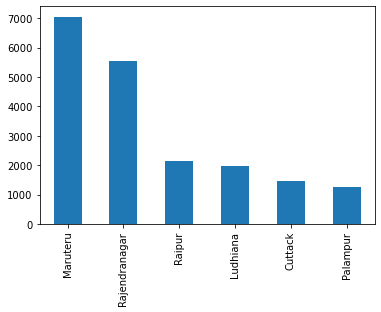

In [25]:
df['Location'].value_counts().plot(kind = 'bar')

In [26]:
# Calculate the total number of observations for each pest type
pest_counts = df['PEST NAME'].value_counts()
pest_counts

Yellowstemborer           4333
Gallmidge                 3016
Greenleafhopper           2287
LeafBlast                 2090
Brownplanthopper          1958
LeafFolder                1716
Whitebackedplanthopper    1248
Miridbug                  1144
Caseworm                   936
ZigZagleafhopper           468
NeckBlast                  208
Name: PEST NAME, dtype: int64

### above is the count of each type of pest found in rice and below chart is visual representation of same

<AxesSubplot:>

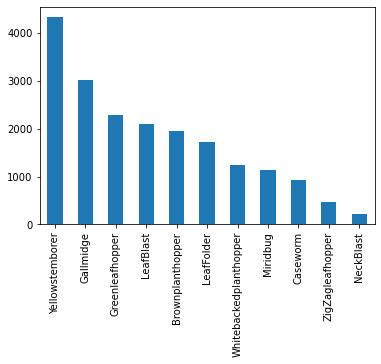

In [27]:
pest_counts.plot(kind = 'bar')

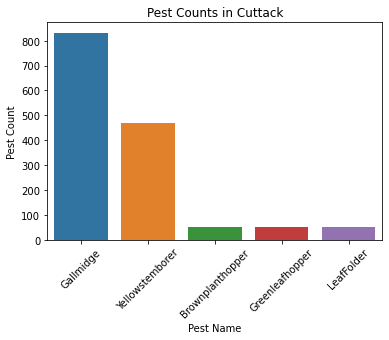

Location Cuttack is most affected by Gallmidge


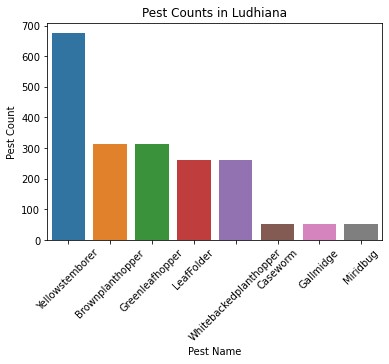

Location Ludhiana is most affected by Yellowstemborer


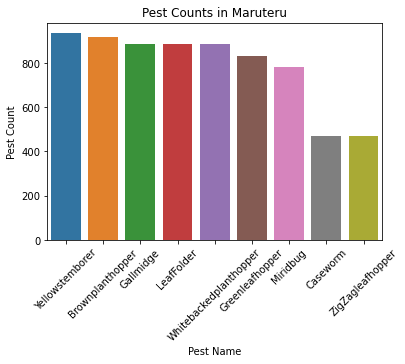

Location Maruteru is most affected by Yellowstemborer


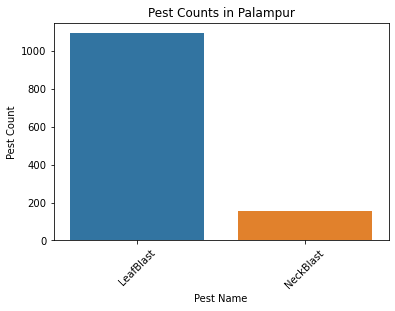

Location Palampur is most affected by LeafBlast


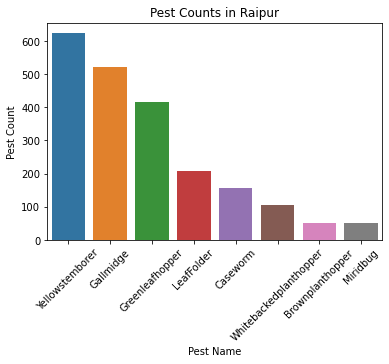

Location Raipur is most affected by Yellowstemborer


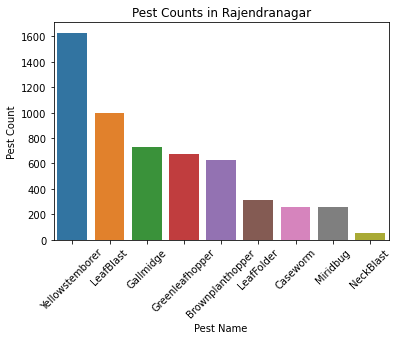

Location Rajendranagar is most affected by Yellowstemborer


In [28]:
location = df[df['Pest Value'] >0]['Location'].unique()

for i in location:
    pest_counts = df[df['Location'] == i].groupby(['Location', 'PEST NAME']).size().reset_index(name='Pest Count')

    # Sort the values based on pest count in descending order
    pest_counts_sorted = pest_counts.sort_values(by='Pest Count', ascending=False)

    # Plot the bar graph
    sns.barplot(x='PEST NAME', y='Pest Count', data=pest_counts_sorted)
    plt.title('Pest Counts in ' + i)
    plt.xlabel('Pest Name')
    plt.ylabel('Pest Count')
    plt.xticks(rotation=45)
    plt.show()
    print('Location', i, 'is most affected by', pest_counts_sorted.iloc[0]['PEST NAME'])

### From above graphs we can state that four out of six given locations are mostly affected by Yellowstemborer pest while for Cuttuck it is second most common pest for rice crop 

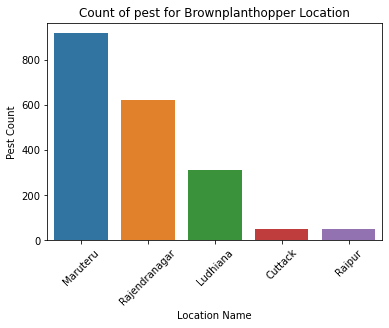

Pest Brownplanthopper is most witnessed in Maruteru


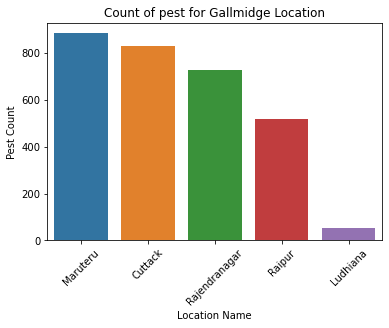

Pest Gallmidge is most witnessed in Maruteru


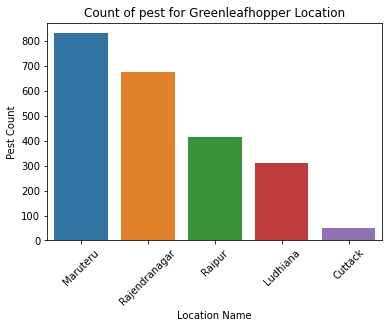

Pest Greenleafhopper is most witnessed in Maruteru


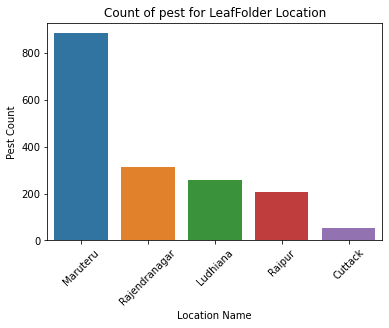

Pest LeafFolder is most witnessed in Maruteru


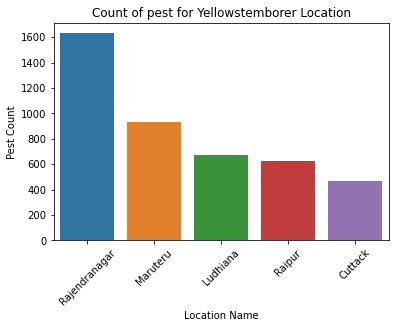

Pest Yellowstemborer is most witnessed in Rajendranagar


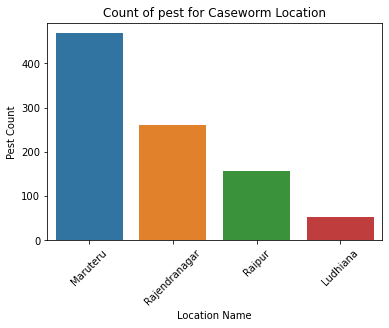

Pest Caseworm is most witnessed in Maruteru


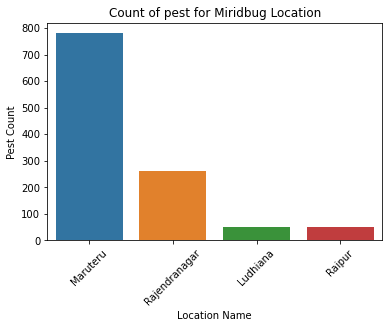

Pest Miridbug is most witnessed in Maruteru


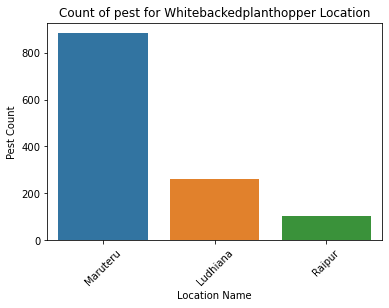

Pest Whitebackedplanthopper is most witnessed in Maruteru


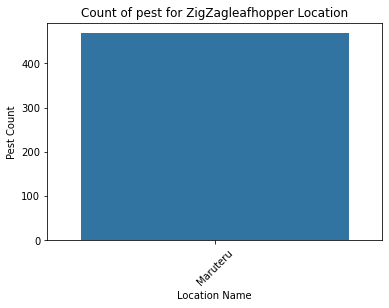

Pest ZigZagleafhopper is most witnessed in Maruteru


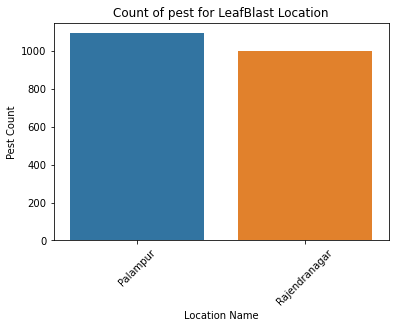

Pest LeafBlast is most witnessed in Palampur


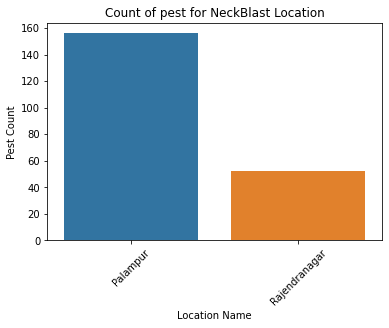

Pest NeckBlast is most witnessed in Palampur


In [29]:
pests_info = df[df['Pest Value']>0]['PEST NAME'].unique()

for i in pests_info:
    pest_counts = df[df['PEST NAME'] == i].groupby(['PEST NAME', 'Location']).size().reset_index(name='Pest Count')

    # Sort the values based on pest count in descending order
    pest_counts_sorted = pest_counts.sort_values(by='Pest Count', ascending=False)

    # Plot the bar graph
    sns.barplot(x='Location', y='Pest Count', data=pest_counts_sorted)
    plt.title('Count of pest for ' + i + ' Location')
    plt.xlabel('Location Name')
    plt.ylabel('Pest Count')
    plt.xticks(rotation=45)
    plt.show()
    print('Pest', i, 'is most witnessed in', pest_counts_sorted.iloc[0]['Location'])

### Above charts are showing occurance of each pest for diffrent locations and we can conclude that Brownplanthopper, Gallmidge, Greenleafhopper, LeafFolder, Caseworm, Miridbug, Whitebackedplanthopper, ZigZagleafhopper these pest are mostly found in Maruteru which means 8 out of 11 Pest are mostly found at Maruteru

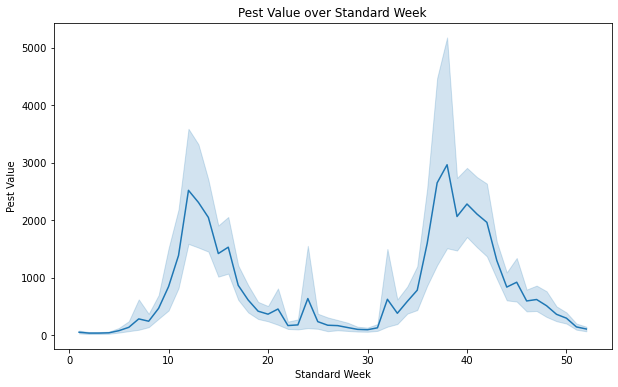

In [30]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the line graph
sns.lineplot(x='Standard Week', y='Pest Value', data=df)

# Set the axis labels and title
plt.xlabel('Standard Week')
plt.ylabel('Pest Value')
plt.title('Pest Value over Standard Week')


plt.show()  # Display the line graph


### Above visualisation shows that there is a distinct spike in the number of pests observed during two specific periods: between the 10th week and the 18th week, and again between the 35th week and the 45th week. This finding suggests a consistent pattern of increased pest activity during these time intervals. It implies that certain factors, possibly related to seasonal changes or specific environmental conditions, contribute to higher pest populations during these periods.

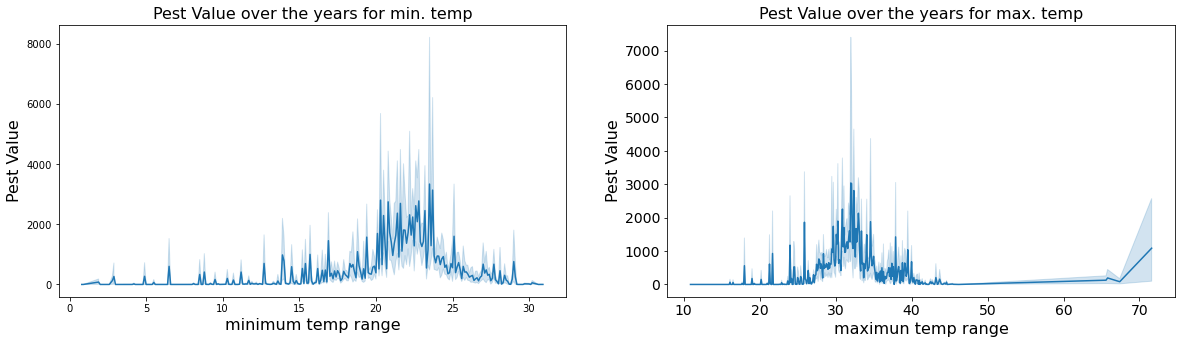

In [31]:
plt.figure(figsize=(20, 5))  # Set the figure size

plt.subplot(1,2,1)
# Plot the line graph
sns.lineplot(x='MinT', y='Pest Value', data=df)

# Set the axis labels and title
plt.xlabel('minimum temp range',fontsize=16)
plt.ylabel('Pest Value',fontsize=16)
plt.title('Pest Value over the years for min. temp',fontsize=16)

plt.subplot(1,2,2)
sns.lineplot(x='MaxT', y='Pest Value', data=df)
# Set the axis labels and title
plt.xlabel('maximun temp range',fontsize=16)
plt.ylabel('Pest Value',fontsize=16)
plt.title('Pest Value over the years for max. temp',fontsize=16)

plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size

plt.show()  # Display the line graph

#### from above visualization we can conclude there is spike in number of pest for min temp. value is between 20 degrees to 25 degrees and for maximun temp. it is between 25 degrees to 35 degrees so it can be concluded that pest are mostly found between 20 degrees to 30 degrees. 

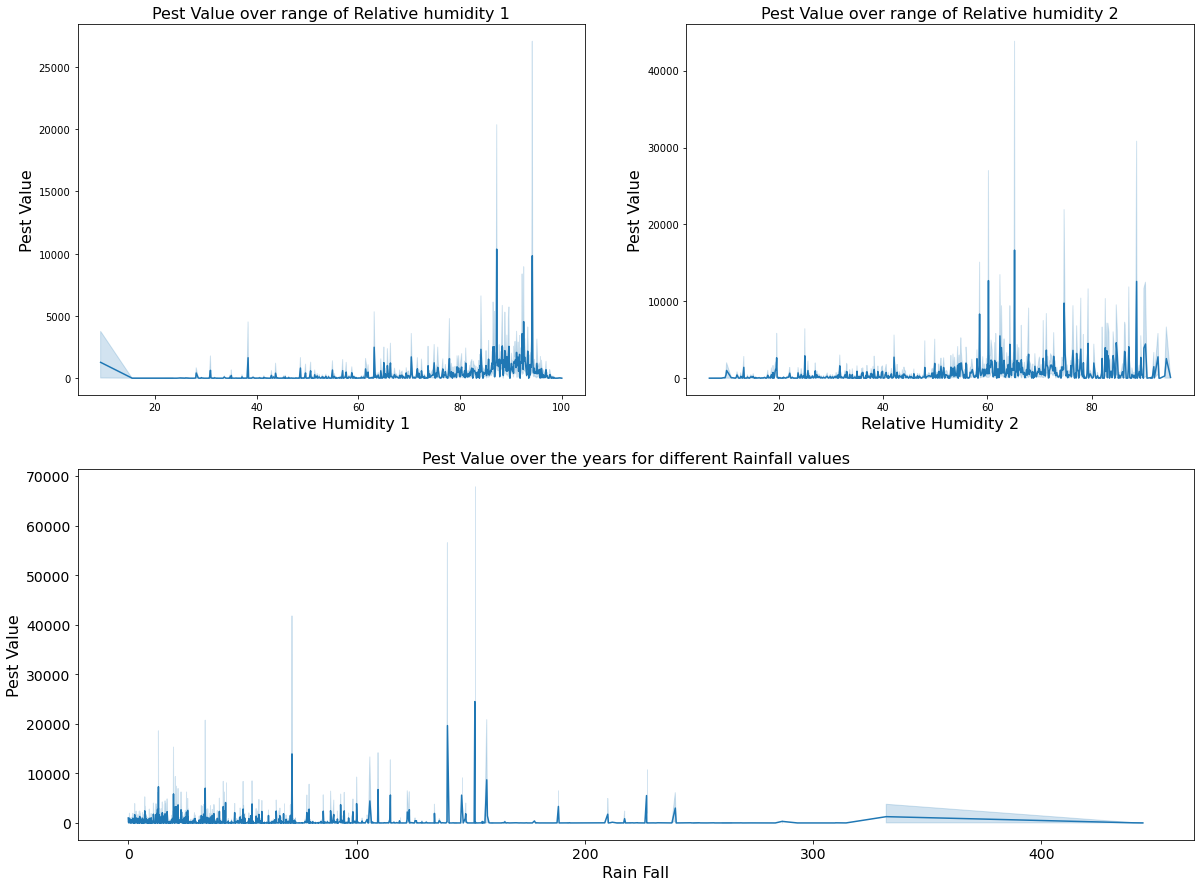

In [34]:
plt.figure(figsize=(20, 15))  # Set the figure size

plt.subplot(2,2,1)
# Plot the line graph
sns.lineplot(x='RH1(%)', y='Pest Value', data=df)

# Set the axis labels and title
plt.xlabel('Relative Humidity 1',fontsize=16)
plt.ylabel('Pest Value',fontsize=16)
plt.title('Pest Value over range of Relative humidity 1',fontsize=16)

plt.subplot(2,2,2)
sns.lineplot(x='RH2(%)', y='Pest Value', data=df)
# Set the axis labels and title
plt.xlabel('Relative Humidity 2',fontsize=16)
plt.ylabel('Pest Value',fontsize=16)
plt.title('Pest Value over range of Relative humidity 2',fontsize=16)


plt.subplot(2,1,2)
sns.lineplot(x='RF(mm)', y='Pest Value', data=df)
# Set the axis labels and title
plt.xlabel('Rain Fall',fontsize=16)
plt.ylabel('Pest Value',fontsize=16)
plt.title('Pest Value over the years for different Rainfall values',fontsize=16)

plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size

plt.show()  # Display the line graph

### From above charts we can conclude that when rainfall is between 80 to 150 mm and relative hunidity is above 60 then there is spike in Pest counts

In [35]:
# Analyze the distribution of pest values based on the collection type
pest_values_by_collection_type = df.groupby('Collection Type')['Pest Value'].mean()
pest_values_by_collection_type

Collection Type
Number/Light trap        953.246318
Number/Pheromone trap     12.061538
Number/hill                1.115385
Percent Damage             1.786058
Percentage                 3.913921
Name: Pest Value, dtype: float64

### we can conclude that maximun pest data in out dataset is collected using Number/Light trap as collection type 

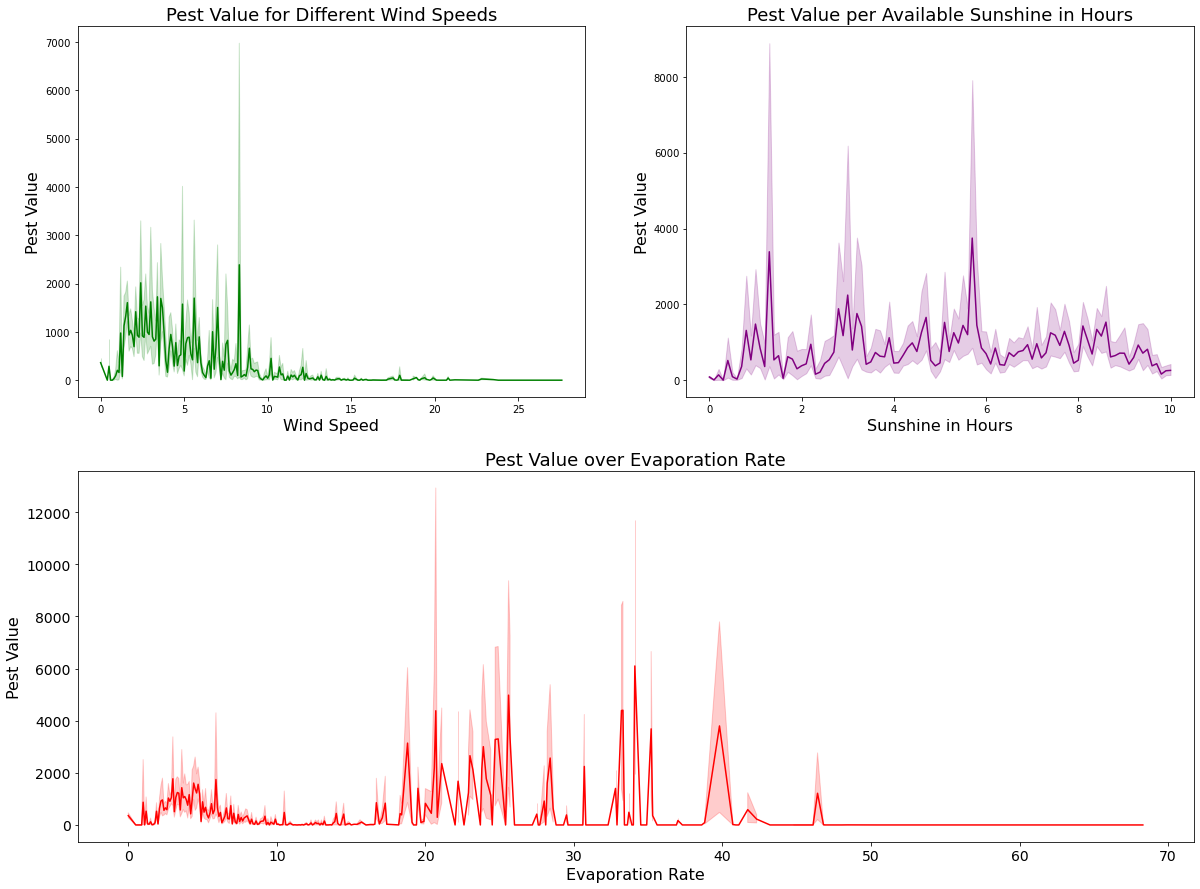

In [36]:
plt.figure(figsize=(20, 15))  # Set the figure size

plt.subplot(2, 2, 1)
# Plot the line graph
sns.lineplot(x='WS(kmph)', y='Pest Value', data=df, color='green')

# Set the axis labels and title
plt.xlabel('Wind Speed', fontsize=16)
plt.ylabel('Pest Value', fontsize=16)
plt.title('Pest Value for Different Wind Speeds', fontsize=18)

plt.subplot(2, 2, 2)
sns.lineplot(x='SSH(hrs)', y='Pest Value', data=df[df['SSH(hrs)'] <= 10], color='purple')
# Set the axis labels and title
plt.xlabel('Sunshine in Hours', fontsize=16)
plt.ylabel('Pest Value', fontsize=16)
plt.title('Pest Value per Available Sunshine in Hours', fontsize=18)

plt.subplot(2, 1, 2)
sns.lineplot(x='EVP(mm)', y='Pest Value', data=df, color='red')
# Set the axis labels and title
plt.xlabel('Evaporation Rate', fontsize=16)
plt.ylabel('Pest Value', fontsize=16)
plt.title('Pest Value over Evaporation Rate', fontsize=18)

plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size

plt.show()  # Display the line graph

### above visualization suggests that a relatively calm wind speed, moderate sunshine duration, and a moderate evaporation rate create favorable conditions for increased pest populations.

## Reccommendations

### Based on the insights derived from the dataset, we can make the following recommendations:

1. Pest Management Strategies: Given that Yellowstemborer is the most common pest in four out of six locations, it is crucial to prioritize pest management measures targeting this particular pest. For Cuttack, where Yellowstemborer is the second most common pest for rice crops, tailored control strategies should also be implemented to mitigate its impact effectively.


2. Maruteru Pest Hotspot: Maruteru shows a high prevalence of multiple pests such as Brownplanthopper, Gallmidge, Greenleafhopper, LeafFolder, Caseworm, Miridbug, Whitebackedplanthopper, and ZigZagleafhopper. This indicates that Maruteru is a hotspot for these pests. Therefore, intensive monitoring and targeted pest control efforts should be focused on this area to minimize crop damage and ensure sustainable agricultural practices.


3. Seasonal Pest Peaks: The dataset reveals distinct spikes in pest counts during the 10th to 18th week and 35th to 45th week. To effectively manage pest populations, it is recommended to allocate additional resources and implement proactive control measures during these time intervals. Monitoring pest activity closely during these periods and deploying timely interventions can help mitigate pest-related risks.


4. Optimal Temperature Range: The analysis indicates that pests are most prevalent when the minimum temperature ranges from 20 to 25 degrees Celsius and the maximum temperature ranges from 25 to 35 degrees Celsius. This suggests that pests thrive in temperatures between 20 to 30 degrees Celsius. Considering this, it is essential to be vigilant and implement pest control measures during these temperature ranges to minimize pest infestations.


5. Rainfall and Humidity Relationship: A spike in pest counts is observed when rainfall ranges from 80 to 150 mm, coupled with relative humidity above 60. Therefore, it is recommended to closely monitor pest activity during periods of rainfall within this range and elevated humidity levels. Adjusting pest management strategies accordingly, such as increasing surveillance or applying targeted treatments, can help mitigate pest outbreaks effectively.


6. Collection Type for Pest Data: The dataset indicates that the maximum pest data is collected using the "Number/Light trap" as the collection type. This suggests that the "Number/Light trap" method is effective in capturing pest populations and should be continued for comprehensive pest monitoring and data collection.


7. Favorable Conditions for Pest Populations: The insight regarding favorable conditions for increased pest populations highlights the importance of considering wind speed, sunshine duration, and evaporation rate. To manage pest populations effectively, it is recommended to prioritize pest control efforts during periods of relatively calm wind speeds, moderate sunshine duration, and moderate evaporation rates.
